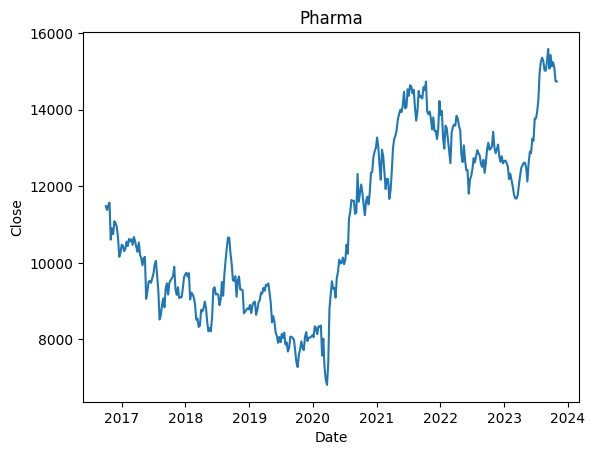

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_pharma = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="pharma_cnx")
plt.plot(df_pharma['Date'],df_pharma['Price'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Pharma")
plt.show()

          Date    Price     Open     High      Low   Volume    Chg%
176 2020-02-16  8364.35  8342.60  8473.80  8068.20  133.74M  0.0039
177 2020-02-23  7576.75  8275.95  8281.95  7559.00  210.51M -0.0942
178 2020-03-01  8018.30  7675.55  8281.70  7463.05  196.70M  0.0583
179 2020-03-08  7268.00  7921.25  7999.30  6242.85  174.00M -0.0936
180 2020-03-15  6951.90  7075.35  7406.05  6332.00  218.95M -0.0435
Percentage change:  -28.422694871538962


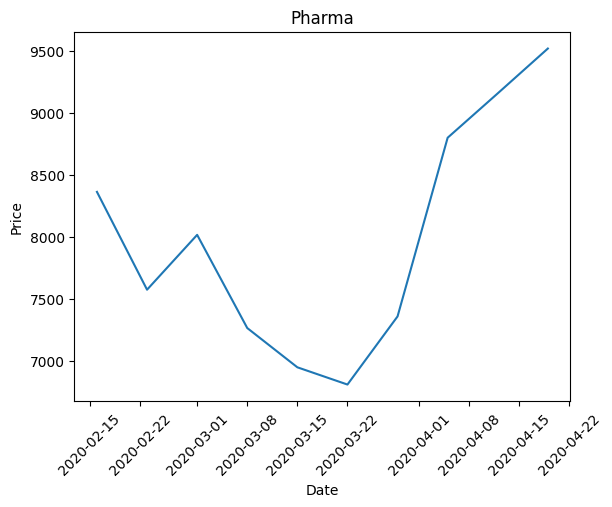

In [10]:
covid_period = df_pharma[(df_pharma['Date'] >= '2020-02-10') & (df_pharma['Date'] <= '2020-04-20')]
print(covid_period.head())
change = ((covid_period['Price'].min()-covid_period['Price'].max())/covid_period['Price'].max())*100
print("Percentage change: ",change)
plt.plot(covid_period['Date'],covid_period['Price'])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Pharma")
plt.show()

In [11]:
post_covid_period = df_pharma[(df_pharma['Date'] >= '2021-01-01') & (df_pharma['Date'] <= '2023-01-01')]
change = ((post_covid_period['Price'].max()-covid_period['Price'].min())/covid_period['Price'].min())*100
print(change)

116.18291367302456


          Date  Adj Close  percent_change
158 2019-07-01   492.6293       -0.507029
159 2019-01-14   491.8569       -0.156791
160 2019-01-21   490.1672       -0.343535
161 2019-01-28   503.3953        2.698691
162 2019-04-02   515.8510        2.474338
          Date    Adj Close  percent_change
157 2019-01-07  10794.95020        0.630170
158 2019-01-14  10906.95020        1.037522
159 2019-01-21  10780.54980       -1.158898
160 2019-01-28  10893.65039        1.049117
161 2019-02-04  10943.59961        0.458517
[0.1479133897382815, 0.2730696959255993, 0.023184696436535417, 0.18198218611820377]


C:\Users\Yash\AppData\Local\Temp\ipykernel_17332\666670295.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_cipla_reg['Date'] = pd.to_datetime(df_cipla_reg['Date'])


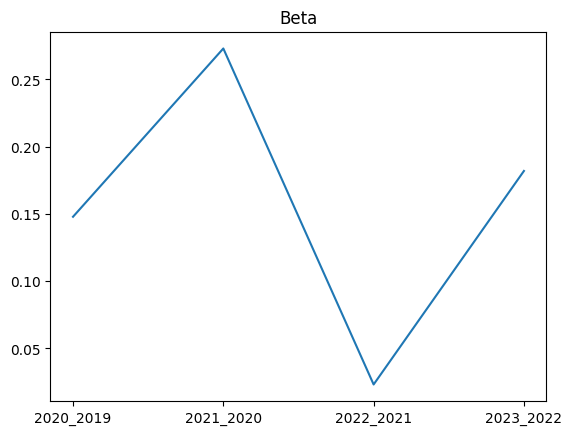

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_cipla_reg = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="cipla")
df_cipla_beta = []
df_cipla_reg['Date'] = pd.to_datetime(df_cipla_reg['Date'])
df_dates = ['2020_2019','2021_2020','2022_2021','2023_2022']
df_cipla_2020_2019 = df_cipla_reg[(df_cipla_reg['Date'] >= '2019-01-01') & (df_cipla_reg['Date'] <= '2020-01-01')]
df_cipla_2021_2020 = df_cipla_reg[(df_cipla_reg['Date'] >= '2020-01-01') & (df_cipla_reg['Date'] <= '2021-01-01')]
df_cipla_2022_2021 = df_cipla_reg[(df_cipla_reg['Date'] >= '2021-01-01') & (df_cipla_reg['Date'] <= '2022-01-01')]
df_cipla_2023_2022 = df_cipla_reg[(df_cipla_reg['Date'] >= '2022-01-01') & (df_cipla_reg['Date'] <= '2023-01-01')]
print(df_cipla_2020_2019.head())

df_nifty50 = pd.read_excel("D:/IT/dav/stocks.xlsx")
df_nifty50_2020_2019 = df_nifty50[(df_nifty50['Date'] >= '2019-01-01') & (df_nifty50['Date'] <= '2020-01-01')]
df_nifty50_2021_2020 = df_nifty50[(df_nifty50['Date'] >= '2020-01-01') & (df_nifty50['Date'] <= '2021-01-01')]
df_nifty50_2022_2021 = df_nifty50[(df_nifty50['Date'] >= '2021-01-01') & (df_nifty50['Date'] <= '2022-01-01')]
df_nifty50_2023_2022 = df_nifty50[(df_nifty50['Date'] >= '2022-01-01') & (df_nifty50['Date'] <= '2023-01-01')]
print(df_nifty50_2020_2019.head())

model = LinearRegression()
model.fit(df_cipla_2020_2019[['percent_change']], df_nifty50_2020_2019['percent_change'])
c1 = model.coef_[0]
df_cipla_beta.append(c1)

model.fit(df_cipla_2021_2020[['percent_change']], df_nifty50_2021_2020['percent_change'])
c2 = model.coef_[0]
df_cipla_beta.append(c2)

model.fit(df_cipla_2022_2021[['percent_change']], df_nifty50_2022_2021['percent_change'])
c3 = model.coef_[0]
df_cipla_beta.append(c3)

model.fit(df_cipla_2023_2022[['percent_change']], df_nifty50_2023_2022['percent_change'])
c4 = model.coef_[0]
df_cipla_beta.append(c4)

print(df_cipla_beta)
plt.plot(df_dates,df_cipla_beta)
plt.title("Beta")
plt.show()


In [13]:
import matplotlib.pyplot as plt
first = df_pharma.head(1)['Price'][0]
second = df_pharma.tail(1)['Price'][369]
print(first,second)
change = ((second-first)/first)*100
print("Percentage change: ",change)

11480.1 14732.4
Percentage change:  28.329892596754373


In [28]:
print("Correlation: ",df_pharma['Price'].corr(df_pharma['Volume1']))


Correlation:  -0.8408905927666243


[None, None, None, None, None, None, None, None, None]

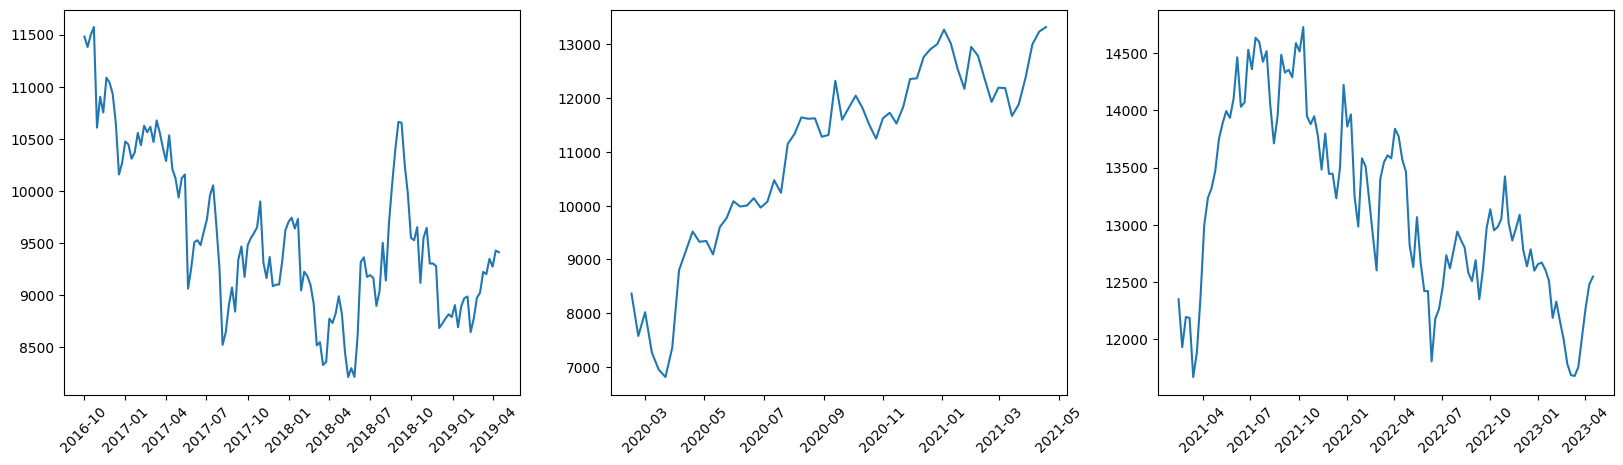

In [30]:
import matplotlib.pyplot as plt
pre_covid_period = df_pharma[(df_pharma['Date'] >= '2016-02-10') & (df_pharma['Date'] <= '2019-04-20')]
covid_period = df_pharma[(df_pharma['Date'] >= '2020-02-10') & (df_pharma['Date'] <= '2021-04-20')]
post_covid_period = df_pharma[(df_pharma['Date'] >= '2021-02-10') & (df_pharma['Date'] <= '2023-04-20')]
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.plot(pre_covid_period['Date'],pre_covid_period['Price'])
ax2.plot(covid_period['Date'],covid_period['Price'])
ax3.plot(post_covid_period['Date'],post_covid_period['Price'])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

In [31]:
post_covid_period = df_pharma[(df_pharma['Date'] >= '2021-01-01') & (df_pharma['Date'] <= '2023-01-01')]
change = ((post_covid_period['Price'].max()-covid_period['Price'].min())/covid_period['Price'].min())*100
print(change)

116.18291367302456


7.169094792997057


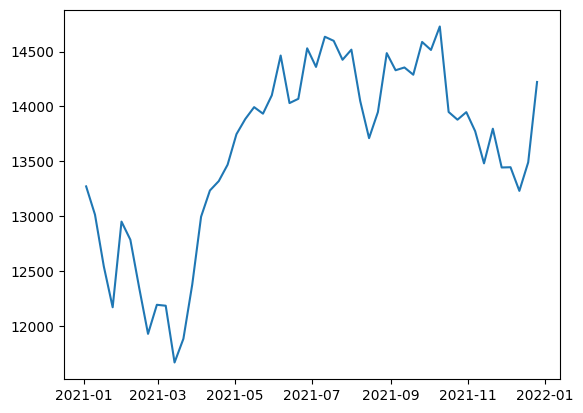

In [5]:
import matplotlib.pyplot as plt
df_pharma_2022_2021 = df_pharma[(df_pharma['Date'] >= '2021-01-01') & (df_pharma['Date'] <= '2022-01-01')]
first = df_pharma_2022_2021.head(1)['Price'][222]
second = df_pharma_2022_2021.tail(1)['Price'][273]
change = ((second-first)/first)*100
print(change)
plt.plot(df_pharma_2022_2021['Date'],df_pharma_2022_2021['Price'])